# Dummy data
**Goal**: Create dummy data to test the estimator on

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklego.loess import LoessSmoother, random_x, generate_noisy_sine_data, plot_windows
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [49]:
np.random.seed(0)
noise_std=2
x, y = generate_noisy_sine_data(noise_std)
model = LinearRegression()

smoother = LoessSmoother(model=None,
                         n_degree=1,
                         transform=False,
                         window_method='knn_symmetric',
                         window_size=2,
                         step_size=.1,
                         fraction=.1)

smoother.fit(x,y)


# plot_windows(x,y, smoother.x_focal_base, smoother.y_focal_base, smoother.indices)


# Full plot

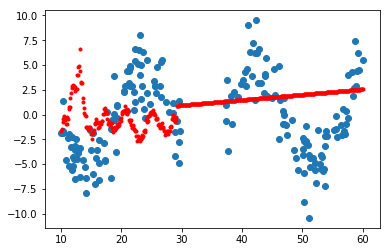

In [50]:
plt.scatter(x, y)
plt.scatter(smoother.x_focal_base,smoother.y_focal_base[1:], c='r', marker='.')

# Tomi's code

In [ ]:
def get_point_sets(self, X):
    self.n_points = math.floor(self.frac * len(X))
    if self.point_extraction == 'knn':
        knn = NearestNeighbors(n_neighbors=self.n_points, metric='euclidean').fit(X)

        # For every point return n nearest points:
        for idx, point in enumerate(X):
            yield knn.kneighbors(point.reshape(-1, 1))[1][0]

    elif self.point_extraction == 'symmetric':
        for idx, point in enumerate(X):
            if idx < math.floor(self.frac * len(X) / 2):
                yield np.array(range(0, idx + math.floor(self.n_points / 2)))

            elif (idx >= math.floor(self.n_points / 2)) & ((idx <= len(X) - math.floor(self.n_points / 2))):
                yield np.array(range(idx - math.floor(self.n_points / 2), idx + math.floor(self.n_points / 2)))

            else:
                yield np.array(range(len(X) - math.floor(self.n_points / 2), len(X)))

    else:
        raise NotImplementedError('Sorry this method has not been implemented.')
